In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/u/Desktop/Remote work/Churn python/churn.csv')

In [3]:
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [43]:
# Check for missing values
print(data.isnull().sum())

# If any missing values are found, fill them with the median (or another suitable strategy)
data = data.fillna(data.median())


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Select the numerical columns for scaling
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the scaled dataset
print(data.head())


   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.326221          0       0  0.293517 -1.041760 -1.225848   
1    -0.440036          2       0  0.198164 -1.387538  0.117350   
2    -1.536794          0       0  0.293517  1.032908  1.333053   
3     0.501521          0       0  0.007457 -1.387538 -1.225848   
4     2.063884          2       0  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      -0.911583          1               1         0.021886       1  
1      -0.911583          0               1         0.216534       0  
2       2.527057          1               0         0.240687       1  
3       0.807737          0               0        -0.108918       0  
4      -0.911583          1               1        -0.365276       0  


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Define the target variable and feature set
X = data.drop('Exited', axis=1)
y = data['Exited']

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Order feature importances from highest to lowest
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)


             Feature  Importance
3                Age    0.188148
11  Balance_Products    0.120061
9    EstimatedSalary    0.094007
0        CreditScore    0.093844
6      NumOfProducts    0.093068
12     Salary_Tenure    0.090982
10        Age_Tenure    0.087705
5            Balance    0.085772
4             Tenure    0.049447
8     IsActiveMember    0.036122
1          Geography    0.032053
2             Gender    0.015244
7          HasCrCard    0.013549


C:\Users\u\AppData\Local\Temp\ipykernel_12612\2592587849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


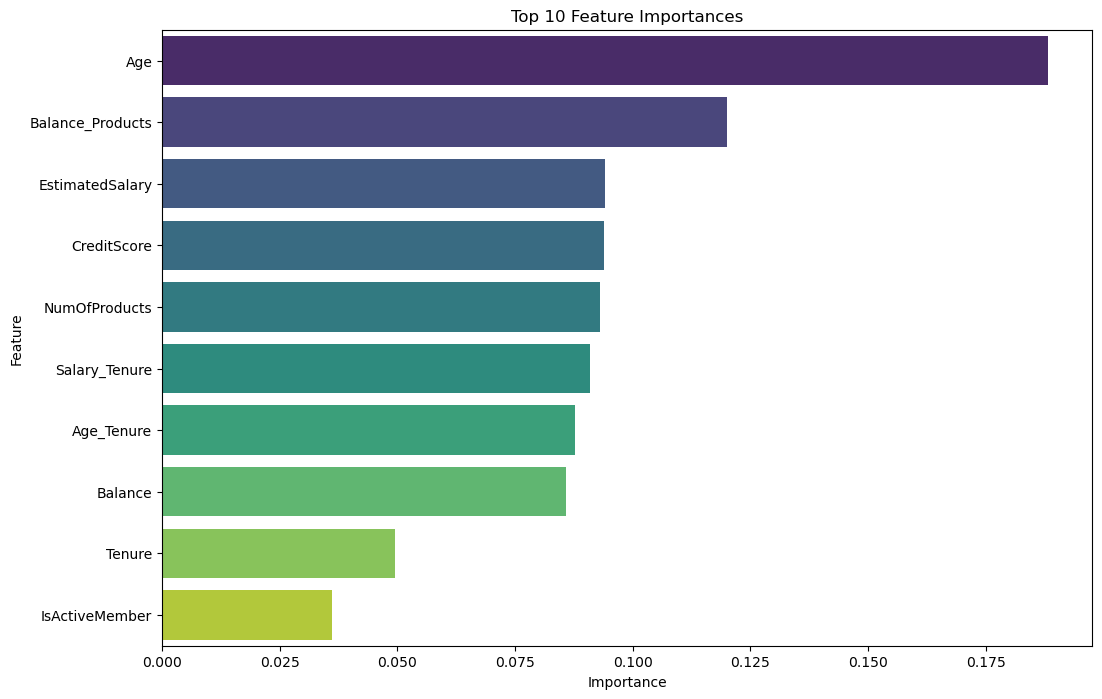

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\u\AppData\Local\Temp\ipykernel_12612\3170583012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


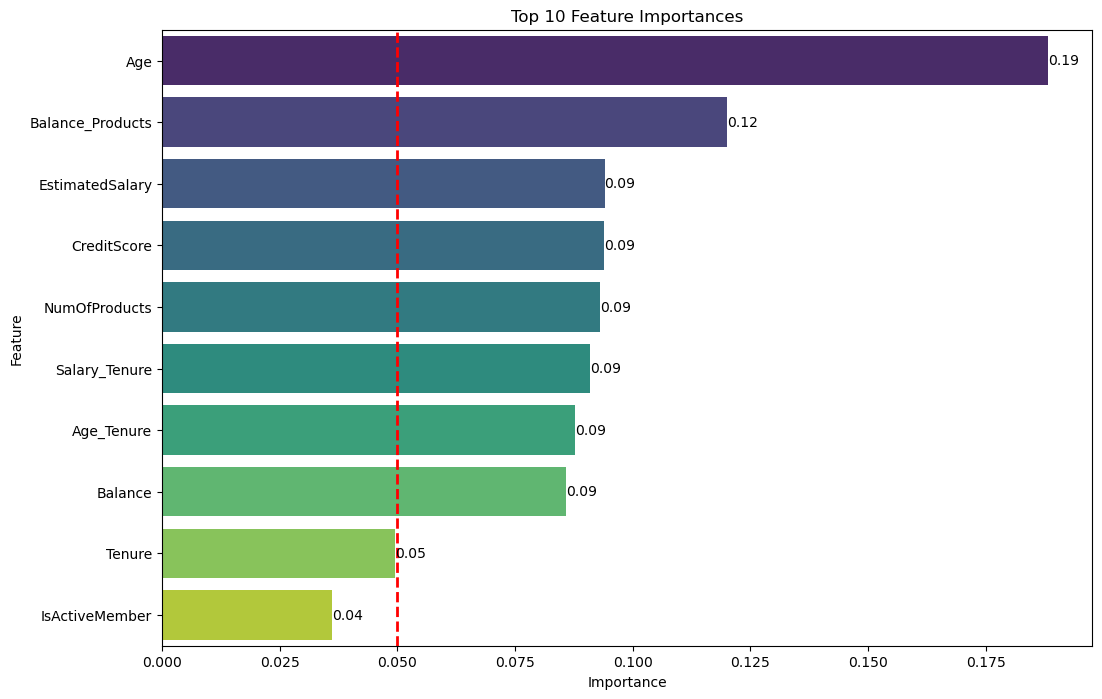

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add values on top of each bar
for index, value in enumerate(feature_importances['Importance'].head(10)):
    plt.text(value, index, f'{value:.2f}', va='center')

# Draw a vertical line at a specific importance threshold (example: 0.05)
threshold = 0.05
plt.axvline(threshold, color='red', linestyle='--', linewidth=2)

plt.show()


In [5]:
# Define features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize models
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

In [9]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [10]:

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [11]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
SVM                    0.8575   0.800000  0.366412  0.502618
Logistic Regression    0.8155   0.600000  0.183206  0.280702
Random Forest          0.8730   0.808889  0.463104  0.588997
KNN                    0.8355   0.633333  0.386768  0.480253


C:\Users\u\AppData\Local\Temp\ipykernel_12612\2911113997.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\2911113997.py:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\2911113997.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\2911113997.py:11: UserWarning: The palette list has more values (5) than needed (4), w

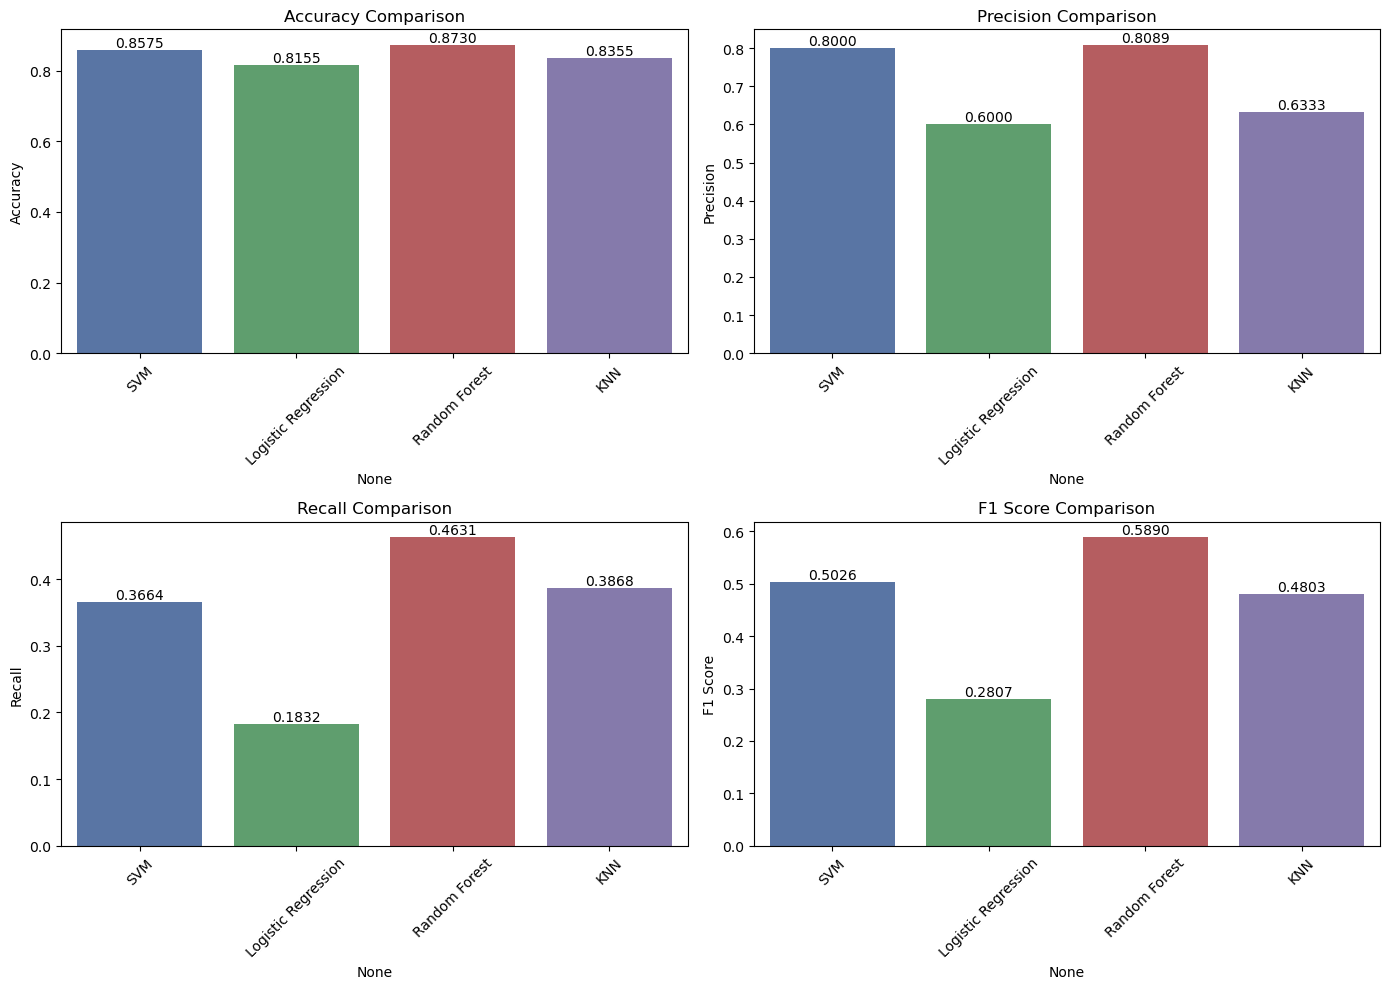

In [20]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Plotting the results using Seaborn
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b3", "#ccb974"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('rf', rf_model)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the voting classifier
accuracy, precision, recall, f1 = evaluate_model(voting_clf, X_test_scaled, y_test)

# Print the evaluation results for the hybrid model
print(f"Hybrid Model (SVM + Random Forest) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Add hybrid model results to the DataFrame for comparison
results_df.loc['Hybrid (SVM + RF)'] = [accuracy, precision, recall, f1]

Hybrid Model (SVM + Random Forest) - Accuracy: 0.8635, Precision: 0.7941, Recall: 0.4122, F1 Score: 0.5427


C:\Users\u\AppData\Local\Temp\ipykernel_12612\1972166774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\1972166774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\1972166774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\

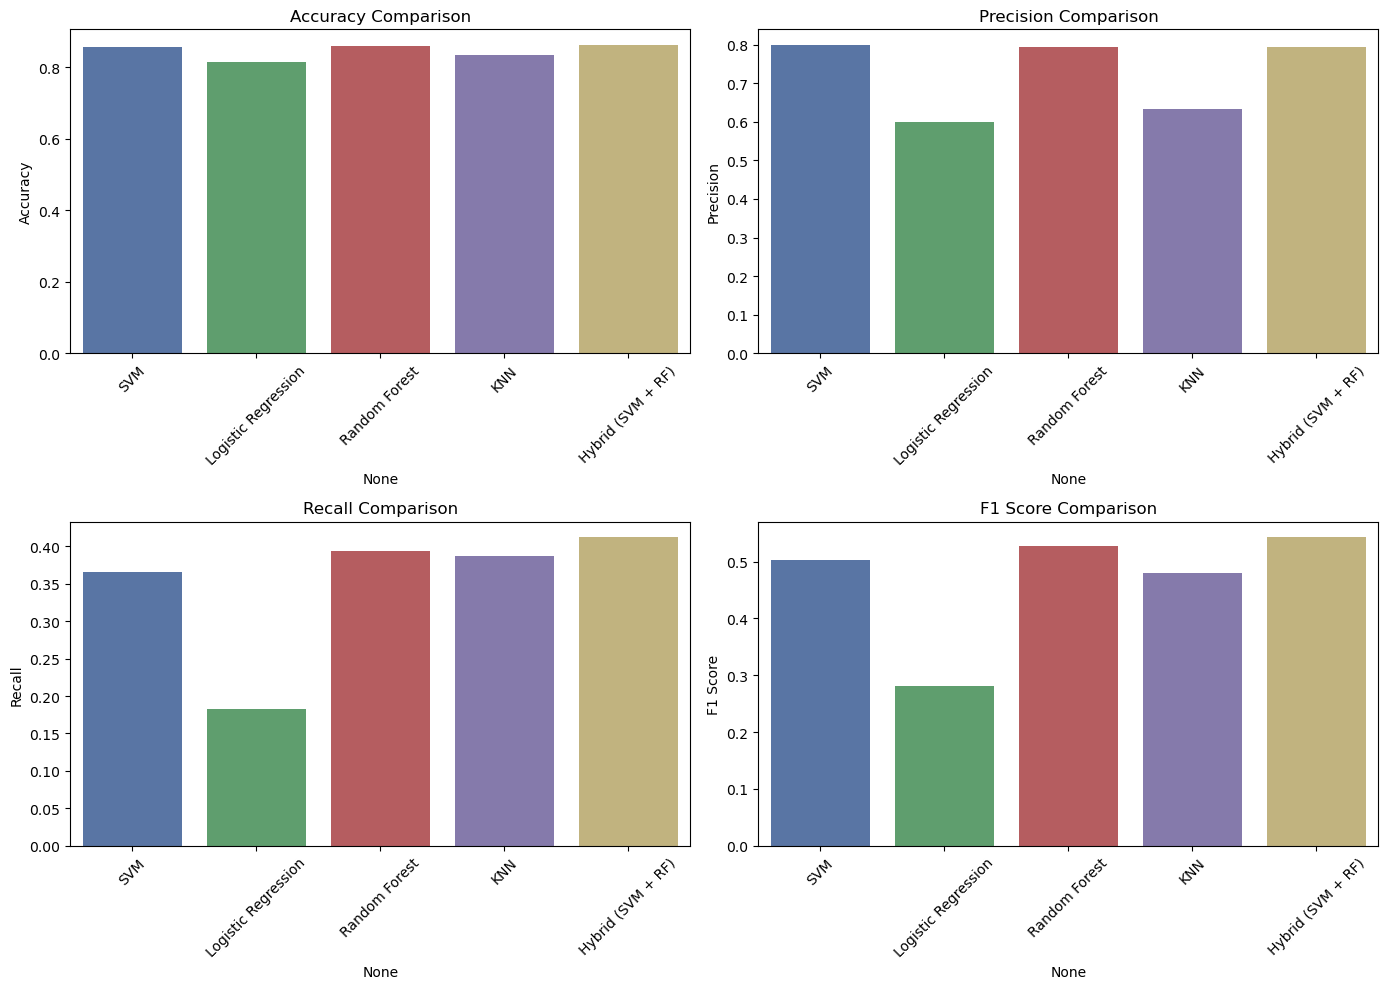

In [39]:
# Assuming you have already defined 'metrics' and 'results_df'
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b3", "#ccb974"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=5, verbose=2, n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
best_svm = svm_grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [26]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, verbose=2, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\u\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\u\anaconda3\envs\Streamlit\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\u\anaconda3\envs\Streamlit\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\u\anaconda3\envs\Streamlit\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File

In [27]:

# Initialize other models
models = {
    "SVM": best_svm,
    "Logistic Regression": LogisticRegression(),
    "Random Forest": best_rf,
    "KNN": KNeighborsClassifier()
}

In [28]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [29]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [54]:
# Create a voting classifier for hybrid model
voting_clf = VotingClassifier(estimators=[('svm', best_svm), ('rf', best_rf)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('svm', SVC(C=1, gamma=0.1, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features='log2',
                                                     n_estimators=200))],
                 voting='soft')

In [59]:
# Assuming voting_clf is your trained model
# Train your model or load it if already trained
# voting_clf = ...
# Save the model to a file
with open('voting_clf', 'wb') as f:
    pickle.dump(voting_clf, f)
print("Model saved successfully!")

Model saved successfully!


In [60]:
# Assuming voting_clf is your trained hybrid model
with open('voting_clf.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

In [55]:
# Evaluate the voting classifier
accuracy, precision, recall, f1 = evaluate_model(voting_clf, X_test_scaled, y_test)

In [56]:
# Add hybrid model results to the dictionary
results['Hybrid (SVM + RF)'] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

In [57]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T

C:\Users\u\AppData\Local\Temp\ipykernel_12612\2962675775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\2962675775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\2962675775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
C:\Users\u\AppData\Local\Temp\ipykernel_12612\

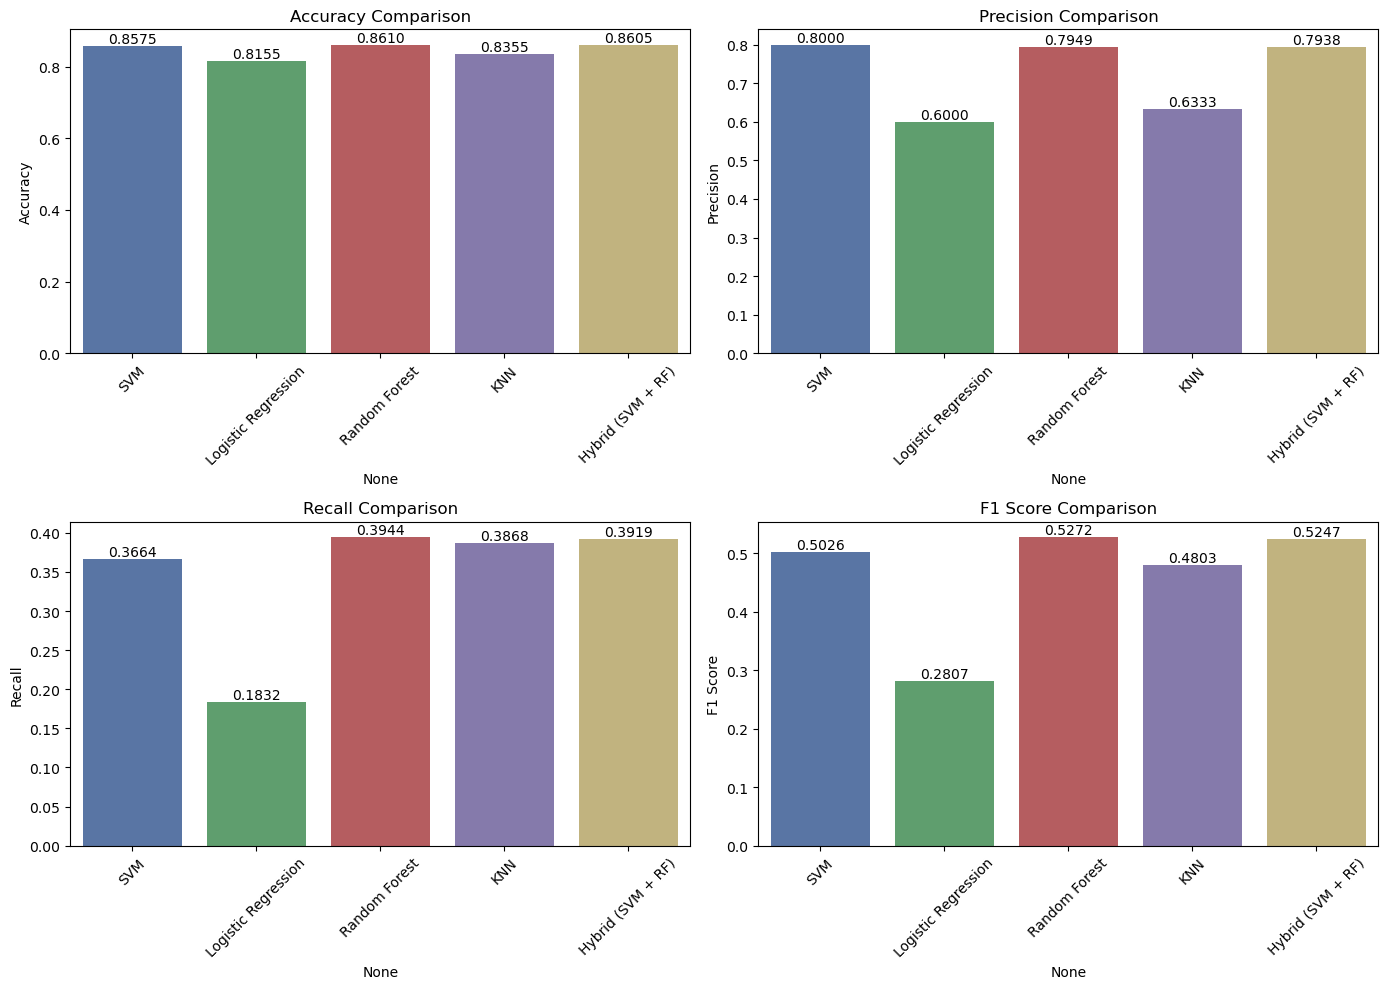

In [58]:
# Plotting the results using Seaborn
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b3", "#ccb974"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette=colors)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
# Print the best hyperparameters for SVM
print("Best hyperparameters for SVM:")
print(svm_grid.best_params_)

# Print the best hyperparameters for Random Forest
print("Best hyperparameters for Random Forest:")
print(rf_grid.best_params_)

Best hyperparameters for SVM:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best hyperparameters for Random Forest:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}


In [36]:
"Explanation of Hyperparameters in SVM and Random Forest
In the realm of machine learning, tuning hyperparameters is critical for optimizing model performance. Hyperparameters are settings that dictate the behavior of a learning algorithm and must be defined before training a model. This process of hyperparameter tuning aims to identify the best set of hyperparameters that result in the highest model performance on validation data.

Support Vector Machine (SVM) Hyperparameters
The best hyperparameters for the SVM model obtained through GridSearchCV are:

C: 1
gamma: 0.1
kernel: 'rbf'
C (Regularization Parameter):

The regularization parameter 
𝐶
C controls the trade-off between achieving a low training error and a low testing error, which is related to the model's ability to generalize to unseen data.
A smaller value of 
𝐶
C (e.g., 0.1) will make the decision surface smooth, but may result in more misclassifications. A larger value of 
𝐶
C (e.g., 100) aims to classify all training examples correctly, which can lead to overfitting.
In this context, 
𝐶
=
1
C=1 represents a balanced trade-off between bias and variance, ensuring a robust model.
gamma (Kernel Coefficient):

The parameter 
𝛾
γ defines the influence of a single training example. A low value means ‘far’ and a high value means ‘close’.
𝛾
=
0.1
γ=0.1 suggests a moderate influence of individual data points. It ensures the decision boundary is neither too complex (high 
𝛾
γ) nor too simple (low 
𝛾
γ), aiding in generalization.
kernel: 'rbf' (Radial Basis Function):

The RBF kernel is a popular choice for SVM due to its ability to handle non-linear data by mapping it to a higher-dimensional space.
The selection of the 'rbf' kernel indicates that the data may not be linearly separable and the model benefits from a more complex decision boundary.
Random Forest Hyperparameters
The best hyperparameters for the Random Forest model obtained through GridSearchCV are:

criterion: 'gini'
max_depth: 8
max_features: 'log2'
n_estimators: 200
criterion: 'gini'

The 'gini' criterion measures the quality of a split in the decision tree by the Gini impurity, which is a measure of how often a randomly chosen element would be incorrectly classified.
This criterion is chosen over 'entropy' in this case, indicating that it provided better performance during cross-validation.
max_depth: 8

The maximum depth of the tree restricts the tree from growing too deep and potentially overfitting the model.
A max depth of 8 limits the number of splits in any path from the root to a leaf, which helps in maintaining the model's generalization capability.
max_features: 'log2'

The 'max_features' parameter determines the number of features to consider when looking for the best split. Using 'log2' ensures that the algorithm considers a subset of features at each split, promoting diversity among the trees and reducing overfitting.
This selection helps to balance bias and variance, contributing to a robust model.
n_estimators: 200

The number of trees in the forest. More trees generally lead to better performance, but with diminishing returns and increased computational cost.
200 trees provide a good balance between performance improvement and computational efficiency.
Academic Research Interpretation
The tuning of hyperparameters is essential in machine learning to enhance the model's performance and robustness. For the Support Vector Machine (SVM), the optimal parameters were found to be 
𝐶
=
1
C=1, 
𝛾
=
0.1
γ=0.1, and using the radial basis function (RBF) kernel. These parameters indicate a balanced approach between regularization and complexity of the decision boundary, tailored to handle non-linear data distributions effectively.

In contrast, the Random Forest model's optimal hyperparameters included using the Gini impurity criterion for split quality, a maximum tree depth of 8, logarithmic selection of features for each split, and constructing an ensemble of 200 trees. These settings emphasize the importance of controlled tree growth and diverse feature selection, which collectively contribute to the ensemble's robustness and accuracy.

Both models have been fine-tuned to their optimal settings, ensuring that they perform well on unseen data by effectively managing the bias-variance trade-off. This hyperparameter tuning process is vital for deploying high-performing machine learning models in real-world scenarios, such as churn prediction in this case. Future research could explore additional hyperparameters and different algorithms to further enhance predictive performance."

SyntaxError: EOL while scanning string literal (2998250040.py, line 1)

In [41]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [50]:
import pickle

# Assuming 'model' is your trained model object
with open('voting_clf.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved successfully!")

Model saved successfully!


In [51]:
import pickle
from sklearn.ensemble import VotingClassifier

# Assuming voting_clf is your trained model
# Train your model or load it if already trained
# voting_clf = ...

# Save the model to a file
with open('your_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

print("Model saved successfully!")

Model saved successfully!


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -r ./requirements.txt

Processing c:\b\abs_27reu1igbg\croot\altair_1687526066495\work (from -r ./requirements.txt (line 2))
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\b\\abs_27reu1igbg\\croot\\altair_1687526066495\\work'

